# Differential Equations

Probably the most common computational physics problems is solving dfferential equations.  These equations are integral to theoretical physics, often describing how a physical system will change with time.

Even if you have not had a course in differential equations yet, a decent understanding of derivatives and the Taylor Series will suffice to approach these problems from a computational approach.

## First-order equations and Euler's Method

The basic form of a first-order (highest degree of differentiation) equation for an independent variable, t, and a dependent variable, x, is -
$$\frac{dx(t)}{dt}=f(x(t),t)$$
where I have explicitly noted the variable dependence.

Often this can be solved analytically, especially by separation of variables or a transformation.  This is not always the case, and even when not analytically solvable, a numerical solution can prove valuable as an approximate solution.

Generally, we will take problem such as these to represent an $\mathbf{''initial\ value\ problem''}$.  In other words, if you know the value of f at some initial starting point -
$$f(x(t_0),t_0)=x_0$$
then you can propagate the solution forward to other values of t.  If t represents time, this is how you evolve a system with time.

To accomplish this, consider the Taylor Series expansion for x around some time t for some value t+h where $h=t-t_0$ -
$$x(t+h) = x(t)+h \frac{dx(t)}{dt} + \frac{1}{2}h^2\frac{d^2x(t)}{dt^2} + ...$$
If we let the initial time be $t_0$, and keep only the first two terms we have -
$$x(t_0+h) = x(t_0)+h \frac{dx(t)}{dt}|{t=t_0} +O(h^2)$$
Now not that the definition of the differential equation gives $\frac{dx}{dt} = f$ which can then be substituted in to get -
$$x(t_0+h) = x(t_0)+h f(x(t_0),t_0)$$

This is the basic formulation of $\mathbf{Euler's\ Method}$.  To move the variable forward, simply repeatedly apply this formula, each time replacing $x(t_0)$ with the new value of $x(t_0+h)$ for the subsequent step.

For an example of how this looks in practice, let us use Example 8.1 from Newman for the equation $\frac{dx}{dt}=-x^3 + sin(t)$

Note that in the code loaded below, we have an important new element, the numpy $\mathbf{arange}$ function which is a variant of range which returns an array instead of a list and creates values from some initial value up to (but not including) some endpoint.

In [5]:
import numpy as np; np.arange(1.0,2.9,0.1)

array([ 1. ,  1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,
        2.1,  2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8])

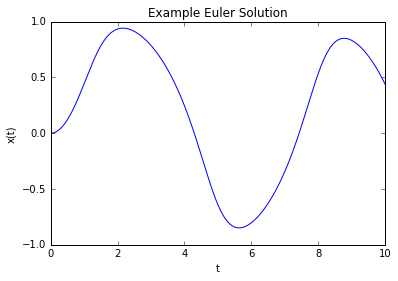

In [11]:
%matplotlib inline
# %load ../newman/euler.py
import numpy as np
import matplotlib.pyplot as plt

def f(x,t):
    return -x**3 + np.sin(t)

a = 0.0           # Start of the interval
b = 10.0          # End of the interval
N = 1000          # Number of steps
h = (b-a)/N       # Size of a single step
x = 0.0           # Initial condition

#create the array of time values and (empty) x-values, and loop over 
#all times supplementing x each time
tpoints = np.arange(a,b,h)
xpoints = []
for t in tpoints:
    xpoints.append(x)
    x += h*f(x,t)

plt.plot(tpoints,xpoints)
plt.title("Example Euler Solution")
plt.xlabel("t")
plt.ylabel("x(t)")
plt.show()


Note that according to our formula, each step is accurate to $O(h^2)$.  Unfortunately, the number of steps we take in propagating the solution to the end is proportional to h.  This means that if we consider how the next term in the Taylor Series builds up, we have for N steps-

$$\sum_{k=0}^{N-1}\frac{1}{2}h^2\frac{d^2x_k(t_k)}{dt^2} = \frac{h}{2}\sum_{k=0}^{N-1}h\frac{d^2x_k(t_k)}{dt^2} \approx \frac{h}{2} \int_{a}^{b}\frac{df}{dt}dt=\frac{h}{2}[f(x(b),b)-f(x(a),a]$$

with the net result that the final error associated with the last value of the variable is proportional to h.

$\mathbf{For\ Lab}$ - think about how you might write a program that models the number of radioactive atoms (N) given the formula -
$$\frac{dN}{dt} = -\frac{N(t)}{\tau}$$

where $\tau$ is called the lifetime.  Note this is solvable analytically, with $N(t)=N_0e^{-(t-t_0)/\tau}$ but provides a useful comparison.

## Runge-Kutta 2nd order (Euler-Cromer)

We can improve the accuracy of this method by contriving to remove higher order terms in the Taylor Series expansion.  This will require us to use more data points.  Consider the scenario in the image below -

![title](fig8-2.png)

Euler's method uses the slope at the beginning of the interval.  A more representative point is in the middle.  Consider using the Taylor series expansion around t+h/2 to estimate the value of the function at t and t+h - 
$$x(t+h) = x(t+\frac{h}{2})+\frac{h}{2} \frac{dx(t)}{dt}|_{t+\frac{h}{2}} + \frac{h^2}{8}\frac{d^2x(t)}{dt^2}|_{t+\frac{h}{2}} + ...$$
$$x(t) = x(t+\frac{h}{2})-\frac{h}{2} \frac{dx(t)}{dt}|_{t+\frac{h}{2}} + \frac{h^2}{8}\frac{d^2x(t)}{dt^2}|_{t+\frac{h}{2}} + ...$$

If we subtract these two equations we get - 
$$x(t+h)  - x(t) = h \frac{dx(t)}{dt}|_{t+\frac{h}{2}} + O(h^3)$$
and then substituting in our formula for dx/dt and solving for x(t+h) gives - 
$$x(t+h)= x(t) + hf(x(t+h/2),t+h/2) + O(h^3)$$

So by calculating the derivative at the midpoint of a segment, we improve the accuracy of the result by one factor of h.

The remaining unknown is the value of x(t+h/2).  To estimate this, we use the Euler method to propagate the solution forward halfway to estimate x(t+h/2) and use this value in f.  To summarize, we do the following steps:
$$k_1 = h f(x,t)$$
$$k_2=h f(x+\frac{k_1}{2},t+\frac{h}{2})$$
$$x(t+h) = x(t) + k_2$$

This is called a $2^{nd}$-order Runge-Kutta method (or midpoint or Euler-Cromer).  Formally, Euler is a $1^{st}$-order Runge-Kutta method.  To apply this for a problem, one essentially updates the for block to calculate the interim and new results -

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def f(x,t):
    return -x**3 + np.sin(t)

a = 0.0           # Start of the interval
b = 10.0          # End of the interval
N = 1000          # Number of steps
h = (b-a)/N       # Size of a single step
x = 0.0           # Initial condition

#create the array of time values and (empty) x-values, and loop over 
#all times supplementing x each time
tpoints = np.arange(a,b,h)
xpoints = []
#modify for block for intermediate and final RK2 calculation
for t in tpoints:
    xpoints.append(x)
    k1 = h*f(x,t)
    k2 = h*f(x+0.5*k1,t+0.5*h)
    x += k2

plt.plot(tpoints,xpoints)
plt.title("Example RK2 Solution")
plt.xlabel("t")
plt.ylabel("x(t)")
plt.show()


## Fourth-order Runge-Kutta

The technique used to improve the accuracy for RK2 can continue, using more and more evaluation points to cancel out higher-order Taylor series terms.  Probably the most popular choice, which provides an even balance of accuracy and programmability, is the fourth-order or RK4 algorithm.  Proving it is not pretty, and there are various incarnations, but we will rely on the following prescription - 

$$k_1 = h f(x,t)$$
$$k_2=h f(x+\frac{k_1}{2},t+\frac{h}{2})$$
$$k_3=h f(x+\frac{k_2}{2},t+\frac{h}{2})$$
$$k_4=h f(x+k_3,t+h)$$
$$x(t+h) = x(t) + \frac{1}{6}(k_1+2k_2+2k_3+k_4)$$

This involves a single step error of $O(h^5)$ and a total accuracy of $O(h^4)$. The price to pay is more evaluations of the derivative function.

$\textbf{For Lab: }$ Consider how you would modify the RK2 code from above to make it an RK4 code. 

## Multiple Variables 

What if we have a system defined by multiple variables?  Our assumption is that we now have simultaneous differential equations defining the changes in each dependent variable. Ultimately, however, there is still only a single independent variable. 

The variables can be dependent on each other, however.  In other words each variable can show up in the differential equation defining the behavior of the others.

The way to handle this problem is to treat the variables as elements in a vector, and the differential equations as elements of a vector equation - 

$$\frac{d{\vec{r}}}{dt}=\vec{f}(\vec{r},t)$$

with $\vec{r}=(x_1,x_2,.....)$ and $\vec{f}(\vec{r},t)= (f_{x_1}(\vec{r},t),f_{x_2}(\vec{r},t),...)$

The numerical solutions of these equations are not that difficult.  Since the Taylor series representations of a single function can be extended to encompass multiple functions, all we have to do is to make the steps of any method (including RK4) vector calculations on an element by element basis.  This means our $k_n$ variables are now $\vec{k}_n$'s.  For instance - 

$$\vec{k}_1 = h \vec{f}(\vec{x},t)$$
$$\vec{k}_2=h f(\vec{x}+\frac{\vec{k}_1}{2},t+\frac{h}{2})$$
$$\vec{k}_3=h f(\vec{x}+\frac{\vec{k}_2}{2},t+\frac{h}{2})$$
$$\vec{k}_4=h f(\vec{x}+\vec{k}_3,t+h)$$
$$\vec{x}(t+h) = \vec{x}(t) + \frac{1}{6}(\vec{k}_1+2\vec{k}_2+2\vec{k}_3+\vec{k}_4)$$

As an example of this, consider Example 8.5 from Newman which uses the following equations - 

$$\frac{dx}{dt} = xy-x\\
\frac{dy}{dt}=y-xy+sin^2(\omega t)$$

In this case, our vector of values would be r=(x,y) and the two equations above are the two elements of a derivative function that takes vector input and returns vector derivatives.

We need to initial conditions in this case, which in the code below we wet to x=y=1.0 at t=0.

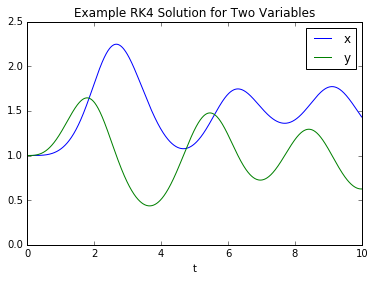

In [10]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def f(r,t):
    x=r[0]
    y=r[1]
    fx = x*y - x
    fy=y - x*y + np.sin(t)**2
    return np.array([fx,fy],float)

a = 0.0           # Start of the interval
b = 10.0          # End of the interval
N = 1000          # Number of steps
h = (b-a)/N       # Size of a single step
x = 0.0           # Initial condition

#create the array of time values and (empty) x-values, and loop over 
#all times supplementing x each time
tpoints = np.arange(a,b,h)
xpoints = []
ypoints = []
r = np.array([1.0,1.0],float)   #initial conditions for x,y, r is current value vector

#all steps are as normal RK4, but vector valued quantities used
for t in tpoints:
    xpoints.append(r[0])
    ypoints.append(r[1])
    k1 = h*f(r,t)
    k2 = h*f(r+0.5*k1,t+0.5*h)
    k3 = h*f(r+0.5*k2,t+0.5*h)
    k4 = h*f(r+k3,t+h)
    r += (k1+2.*k2+2.*k3+k4)/6

plt.plot(tpoints,xpoints,label='x')
plt.plot(tpoints,ypoints,label='y')
plt.title("Example RK4 Solution for Two Variables")
plt.xlabel("t")
plt.legend(loc='upper right')
#plt.ylabel("x(t)")
plt.show()